In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

In [24]:
X = train_data.drop(columns='label')
y = train_data['label']

In [25]:
from sklearn.model_selection import train_test_split


X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
X_train = X_train / 255
X_val = X_val / 255

In [27]:
X_train = X_train.values
X_val = X_val.values

In [28]:
X_train = X_train.reshape(-1,28,28,1)
X_val = X_val.reshape(-1,28,28,1)

In [29]:
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)

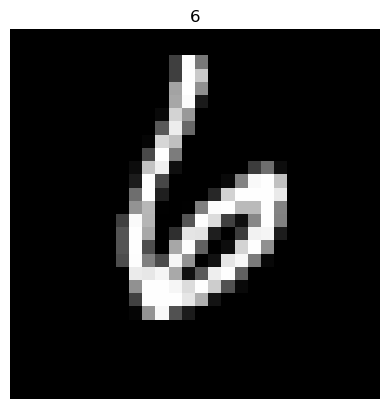

In [30]:
index = 0  

# Trích xuất ảnh và nhãn tương ứng
image = X_train[index]  
label = y_train[index]
index = np.where(label == 1)[0][0]

# Hiển thị ảnh
plt.imshow(image.squeeze(), cmap='gray')  # squeeze() loại bỏ chiều dư thừa, hiển thị ảnh 28x28
plt.title(f"{index}")  
plt.axis('off') 
plt.show()

In [31]:
model = Sequential()

# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm relu làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))

model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())

# Thêm Fully Connected layer với 128 nodes và dùng hàm relu
model.add(Dense(128, activation='relu'))

# Output layer với 10 node và dùng softmax function để chuyển sang xác suất.
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, verbose=1,callbacks=[early_stopping])

c:\Users\Laptop\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - accuracy: 0.8993 - loss: 0.3685 - val_accuracy: 0.9794 - val_loss: 0.0716
Epoch 2/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.9817 - loss: 0.0594 - val_accuracy: 0.9804 - val_loss: 0.0625
Epoch 3/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.9885 - loss: 0.0378 - val_accuracy: 0.9800 - val_loss: 0.0628
Epoch 4/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.9921 - loss: 0.0252 - val_accuracy: 0.9779 - val_loss: 0.0706
Epoch 5/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.9941 - loss: 0.0167 - val_accuracy: 0.9823 - val_loss: 0.0619
Epoch 6/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.9963 - loss: 0.0118 - val_accuracy: 0.9823 - val_loss: 0.0618
Epoch 7/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.9973 - loss: 0.0084 - val_accuracy: 0.9833 - val_loss: 0.0644
Epoch 8/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.9979 -

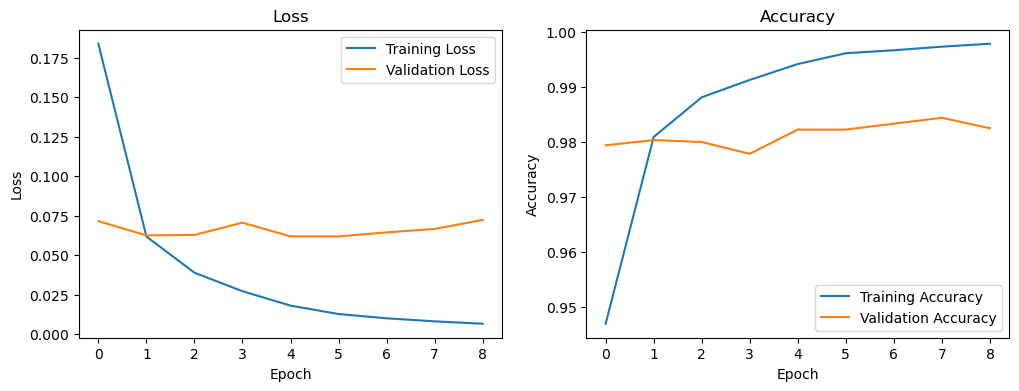

In [33]:
plt.figure(figsize=(12, 4))

# Biểu đồ loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Biểu đồ accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [35]:
test_data = test_data.values
test_data = test_data.reshape(-1,28,28,1)

In [38]:
test_pred = model.predict(test_data)
predicted_labels = np.argmax(test_pred, axis=1)

submission = pd.DataFrame({
    "ImageId": np.arange(1, len(predicted_labels) + 1),
    "Label": predicted_labels
})

print(submission)

875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step
       ImageId  Label
0            1      2
1            2      0
2            3      9
3            4      0
4            5      3
...        ...    ...
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      9
27999    28000      2

[28000 rows x 2 columns]


In [40]:
submission.to_csv("../submission/submission.csv", index=False)